## Part.1 plots


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_ = r'C:\Users\zcemg08\DataspellProjects\KTP_test\data\calibration.csv'
df = pd.read_csv(dir_)

In [3]:
df_blank = df[df['Sample']=='Blank']
df_pigment = df[df['Sample']=='S1']

In [4]:
### Data for solvent only
### AVERAGE repeated experiments to lower each experiment bias in measures
df_blank = df_blank.groupby('Dilution').mean(numeric_only=True)
df_blank

,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum).1,Raw Data (Abs Spectrum).2,Raw Data (Abs Spectrum).3,Raw Data (Abs Spectrum).4,Raw Data (Abs Spectrum).5,Raw Data (Abs Spectrum).6,Raw Data (Abs Spectrum).7,Raw Data (Abs Spectrum).8,Raw Data (Abs Spectrum).9,...,Raw Data (Abs Spectrum).281,Raw Data (Abs Spectrum).282,Raw Data (Abs Spectrum).283,Raw Data (Abs Spectrum).284,Raw Data (Abs Spectrum).285,Raw Data (Abs Spectrum).286,Raw Data (Abs Spectrum).287,Raw Data (Abs Spectrum).288,Raw Data (Abs Spectrum).289,Raw Data (Abs Spectrum).290
Dilution,,,,,,,,,,,,,,,,,,,,,
1,3.603,3.555333,4.068667,4.390333,4.937333,4.962,5.287,5.287,5.154333,5.287,...,0.050667,0.05,0.049667,0.049,0.049,0.049333,0.049333,0.049667,0.049667,0.048667


In [5]:
### data for pigment and solvent
### AVERAGE repeated experiments to lower each experiment bias in measures
df_pigment = df_pigment.groupby('Dilution').mean(numeric_only=True)

df_pigment

,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum).1,Raw Data (Abs Spectrum).2,Raw Data (Abs Spectrum).3,Raw Data (Abs Spectrum).4,Raw Data (Abs Spectrum).5,Raw Data (Abs Spectrum).6,Raw Data (Abs Spectrum).7,Raw Data (Abs Spectrum).8,Raw Data (Abs Spectrum).9,...,Raw Data (Abs Spectrum).281,Raw Data (Abs Spectrum).282,Raw Data (Abs Spectrum).283,Raw Data (Abs Spectrum).284,Raw Data (Abs Spectrum).285,Raw Data (Abs Spectrum).286,Raw Data (Abs Spectrum).287,Raw Data (Abs Spectrum).288,Raw Data (Abs Spectrum).289,Raw Data (Abs Spectrum).290
Dilution,,,,,,,,,,,,,,,,,,,,,
1,3.308667,3.441000,3.574333,3.938000,4.580667,4.672333,5.213000,5.164333,4.839000,5.210667,...,0.065667,0.065333,0.065333,0.064333,0.064000,0.064000,0.065000,0.064000,0.064000,0.063000
2,3.430000,3.735333,4.072000,4.427000,5.034000,5.214667,5.229667,5.287000,4.903333,5.177000,...,0.054333,0.054333,0.054667,0.053000,0.052333,0.053000,0.054333,0.053333,0.053000,0.052000
4,3.431333,3.862667,3.926000,4.402000,5.008667,4.993667,5.084667,5.287000,5.097000,5.159333,...,0.052667,0.052333,0.052000,0.050667,0.050667,0.051000,0.052000,0.050333,0.051333,0.050667
8,3.993333,3.623000,3.911333,4.192000,4.831333,5.187667,5.029667,5.285667,5.059667,5.287000,...,0.053000,0.052667,0.052667,0.051333,0.051333,0.052000,0.052000,0.051667,0.052667,0.051000
16,3.739000,4.093000,4.325333,4.613333,5.144667,5.287000,5.144667,5.287000,5.061000,5.262333,...,0.051667,0.051333,0.051000,0.050333,0.049333,0.050667,0.050667,0.050000,0.051000,0.049667
32,3.285667,3.717000,4.035000,4.168667,5.018333,5.287000,4.961000,5.287000,5.212667,5.287000,...,0.050667,0.050333,0.050333,0.049667,0.048667,0.049333,0.049667,0.049333,0.050333,0.049667
64,3.305333,3.379000,3.781333,3.890667,4.530667,4.794333,4.960333,5.249667,4.802667,5.192667,...,0.052333,0.052333,0.052333,0.050667,0.050333,0.051000,0.051667,0.051333,0.051000,0.050333
128,3.859667,4.211667,4.321000,4.615333,5.127667,5.129333,5.102000,5.287000,5.109000,5.181000,...,0.051667,0.051333,0.051333,0.050667,0.050000,0.050667,0.051000,0.050667,0.051333,0.050000


## Answer part 1

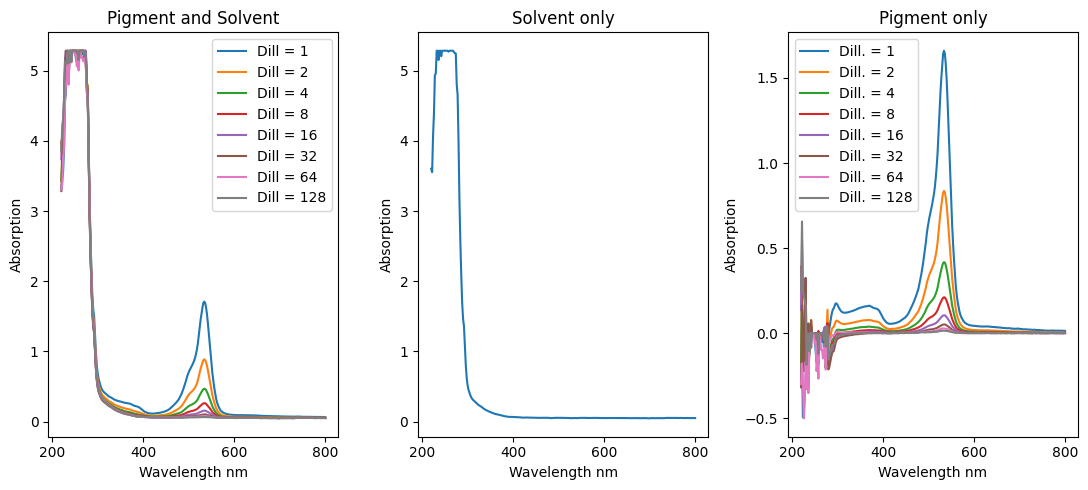

In [6]:
WAVELENGTH = [220 + 2*x for x in range(291)] ### WAVELENGTHS GIVEN BY 200 +2K
solvent_A  = df_blank.values[0] ### solvent A values are taken from Blank experiments

fig, axs = plt.subplots(1, 3,figsize=(11,5))

for dill in df_pigment.index:

    A = list(df_pigment[df_pigment.index==dill].values[0])
    axs[0].plot(WAVELENGTH,A,label='Dill = {}'.format(dill))
    axs[2].plot(WAVELENGTH,list(df_pigment[df_pigment.index==dill].values[0]-solvent_A),label='Dill. = {}'.format(dill)) # pigment A = total A - solvent A

    axs[0].set_xlabel('Wavelength nm')
    axs[0].set_ylabel('Absorption')
    axs[0].set_title('Pigment and Solvent')
    axs[0].legend()

    axs[2].set_xlabel('Wavelength nm')
    axs[2].set_ylabel('Absorption')
    axs[2].set_title('Pigment only')
    axs[2].legend()

axs[1].plot(WAVELENGTH,list(solvent_A))
axs[1].set_xlabel('Wavelength nm')
axs[1].set_ylabel('Absorption')
axs[1].set_title('Solvent only')

fig.tight_layout()

### looks sensible since curves for high value of dilution look similar to pure solvent

1. Finding
the above plot shows
that after dilution >=8, pigment has negligible contribution to total absorption values.
This makes sense,since the concentration of pigment = 50*2^(-log_{2}(dillution_value)), which exponentially decays

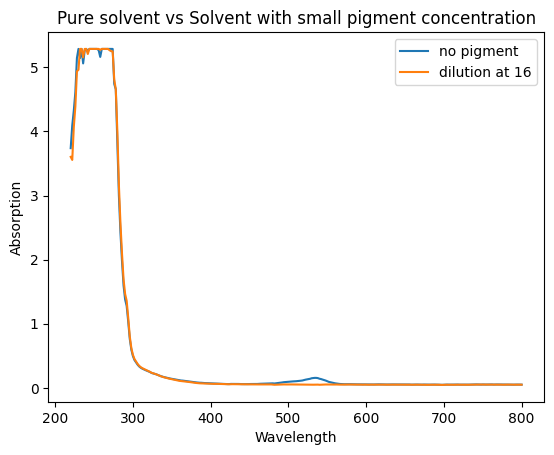

In [7]:
plt.plot(WAVELENGTH,df_pigment[df_pigment.index==16].values[0],label='no pigment')
plt.plot(WAVELENGTH,list(df_blank.values[0]),label='dilution at 16')
plt.title('Pure solvent vs Solvent with small pigment concentration')
plt.xlabel('Wavelength')
plt.ylabel('Absorption')
plt.legend()

2. Finding
   Pigment only plot shows that pigment A values for different concentrations are the most sensetive for the wavelengths between 300nm and 600nm
   Which could be due to quantum chemical effects